# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**



```
# This is formatted as code
```

## Name: Lucy Zhang

## UNI: xz3141

## The Dataset


### Description

This data set contains details of ecommerce product shipment tracking and the target variable is a binary variable reflecting the fact whether the product reached on time or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [2]:
## YOUR CODE HERE
df = pd.read_csv("data.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_On_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


**1.2: Are there any missing values in the dataset?**

In [3]:
## YOUR CODE HERE
df = df.dropna(how='any')
df
# no missing value

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_On_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


**1.3: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**


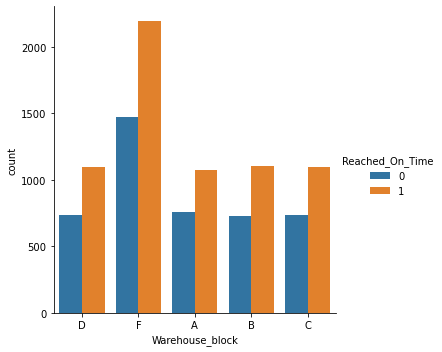

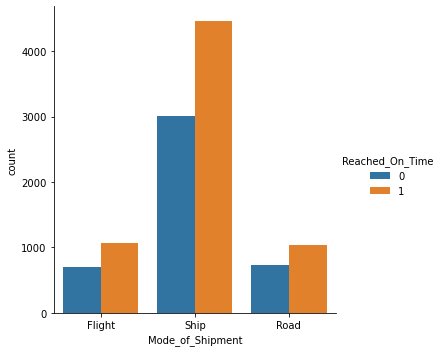

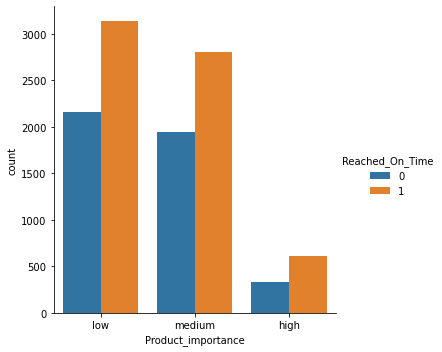

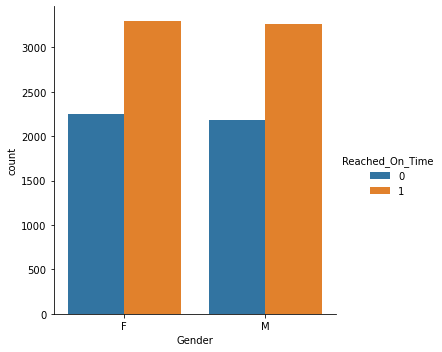

In [4]:
## YOUR CODE HERE
categorical_variables = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
for i, name in enumerate(categorical_variables):
    sns.catplot(x = name, hue = 'Reached_On_Time', kind = 'count', data = df)
plt.show()

**1.4: Explain the distribution of the target variable and the dataset.**


In [5]:
## YOUR CODE HERE
tv = df.groupby('Reached_On_Time').size()
tv

# the dataset is imbalanced because 0 takes 40.3% of the data and 1 takes 59.7% of the data.
# in each categorical variable, the data is also not distributed in balance

Reached_On_Time
0    4436
1    6563
dtype: int64

**1.5: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.**

In [6]:
## YOUR CODE HERE
X = df.drop(columns = ['Reached_On_Time'])
y = df['Reached_On_Time']

X_dev, X_test, y_dev, y_test = train_test_split(X, y,stratify=y,test_size=0.2)

# Strategified splitting should be used here because the dataset is imbalanced.
# In this way, it ensures the 0-to-1 ratio in each of the train, val, and test set are fairly the same.

**1.6: Would you drop any column? Justify your reasoning.** 

**Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**



In [7]:
## YOUR CODE HERE
X_dev = X_dev.drop(columns = ['ID'])
X_test = X_test.drop(columns = ['ID'])

# ID should be dropped because it does not effect whether a shipment would be on time or not, 
# but it will affect the model.

# There is no need to do scaling because this is a tree-based method

In [8]:
corr = X.corr()
corr

# there are no 2 features that are highly correlated

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [10]:
# categorical variable encoding

X_dev['Gender'] = np.where(X_dev['Gender'] == 'M', 1, 0)
X_test['Gender'] = np.where(X_test['Gender'] == 'M', 1, 0)

enc=OrdinalEncoder(categories=[list(X_dev['Product_importance'].unique())],handle_unknown='use_encoded_value',unknown_value=np.nan)
X_dev['Product_importance']=enc.fit_transform(X_dev['Product_importance'].to_numpy().reshape(-1,1))
X_test['Product_importance']=enc.transform(X_test['Product_importance'].to_numpy().reshape(-1,1))

enc1= OneHotEncoder()
ohdev = enc1.fit_transform(X_dev[['Warehouse_block']])
ohdevdf = pd.DataFrame(ohdev.toarray(), columns = enc1.get_feature_names_out())
X_dev_ = X_dev.join(ohdevdf)
X_dev_.drop(['Warehouse_block'], axis = 1, inplace = True)
X_dev_.fillna(0, inplace = True)

ohtest = enc1.transform(X_test[['Warehouse_block']])
ohtestdf = pd.DataFrame(ohtest.toarray(), columns = enc1.get_feature_names_out())
X_test_ = X_test.join(ohtestdf)
X_test_.drop(['Warehouse_block'], axis = 1, inplace = True)
X_test_.fillna(0, inplace = True)

enc2= OneHotEncoder()
ohdev2 = enc2.fit_transform(X_dev[['Mode_of_Shipment']])
ohdevdf2 = pd.DataFrame(ohdev2.toarray(), columns = enc2.get_feature_names_out())
X_dev_2 = X_dev_.join(ohdevdf2)
X_dev_2.drop(['Mode_of_Shipment'], axis = 1, inplace = True)
X_dev_2.fillna(0, inplace = True)

ohtest2 = enc2.transform(X_test[['Mode_of_Shipment']])
ohtestdf2 = pd.DataFrame(ohtest2.toarray(), columns = enc2.get_feature_names_out())
X_test_2 = X_test_.join(ohtestdf2)
X_test_2.drop(['Mode_of_Shipment'], axis = 1, inplace = True)
X_test_2.fillna(0, inplace = True)

**1.7: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.**

In [11]:
## YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

In [12]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_dev_2, y_dev)
y_pred_dev = classifier.predict(X_dev_2)
y_pred_test = classifier.predict(X_test_2)

# performance
tn, fp, fn, tp=confusion_matrix(y_pred_dev,np.array(y_dev)).ravel()
tn2, fp2, fn2, tp2=confusion_matrix(y_pred_test,np.array(y_test)).ravel()

precision=tp/(tp+fp)
recall=tp/(tp+fn)
F1=2*precision*recall/(precision+recall)

precision2=tp2/(tp2+fp2)
recall2=tp2/(tp2+fn2)
F1_2=2*precision2*recall2/(precision2+recall2)

print('F-1 score on dev set:', F1)
print('Accuracy on dev set', classifier.score(X_dev_2,y_dev))

print('F-1 score on test set:',F1_2)
print('Accuracy on test set', classifier.score(X_test_2,y_test))

F-1 score on dev set: 1.0
Accuracy on dev set 1.0
F-1 score on test set: 0.7094568932776301
Accuracy on test set 0.6522727272727272


**1.8: Visualize the trained tree until the max_depth 8.**

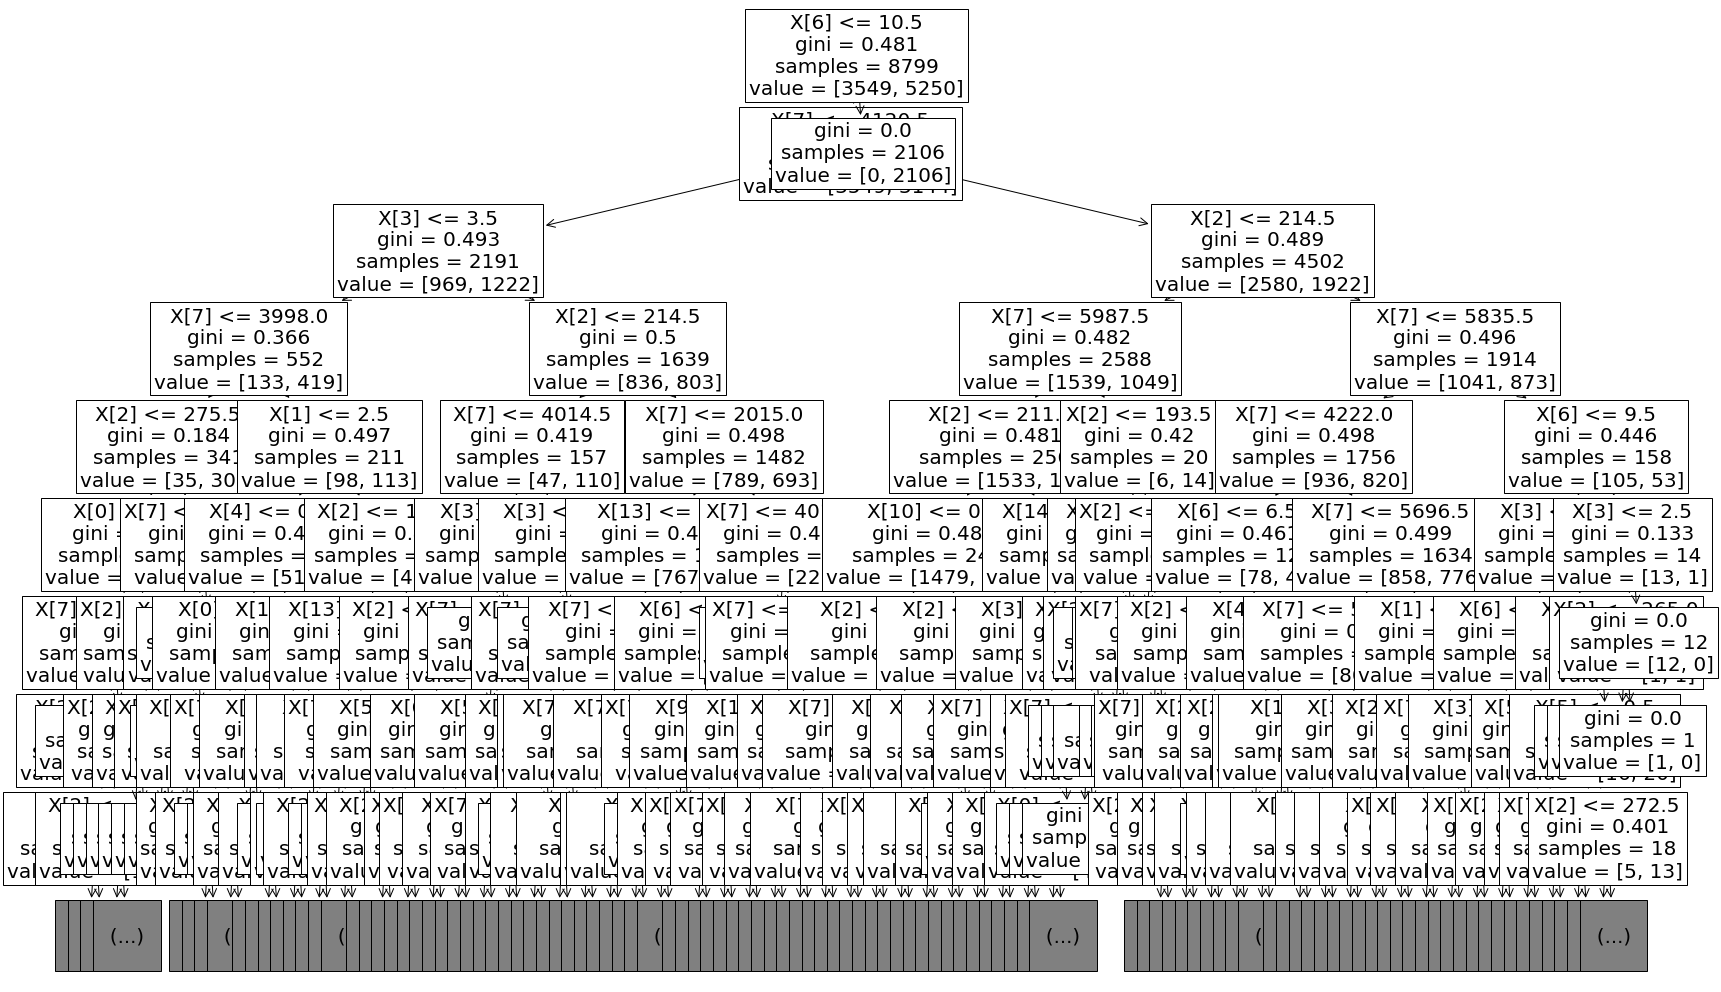

In [13]:
## YOUR CODE HERE

plt.figure(figsize = (28, 18))
tree.plot_tree(classifier, max_depth = 8, fontsize=20);

**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance.**

**Print the optimal value of the tuned parameter.**

In [14]:
## YOUR CODE HERE

path = classifier.cost_complexity_pruning_path(X_dev_2, y_dev)
alphas, impurities = path.ccp_alphas, path.impurities
len(alphas)

845

In [15]:
# performance

results = dict()
modelr=dict()

for i in alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    clf.fit(X_dev_2,y_dev)
    
    y_pred = clf.predict(X_test_2)
    accuracy = clf.score(X_test_2,y_test)
    results[i]=accuracy
    modelr[i]=clf
    
new = sorted(results.items(), key=lambda x:x[1], reverse=True)

y_pred_new = modelr[new[1][0]].predict(X_test_2)

tn_new, fp_new, fn_new, tp_new = confusion_matrix(y_pred_new, np.array(y_test)).ravel()
precision_new = tp_new/(tp_new+fp_new)
recall_new = tp_new/(tp_new+fn_new)
F1_new = 2*precision_new*recall_new/(precision_new+recall_new)

print('Precision: ', precision_new)
print('Recall: ', recall_new)
print('F-1 score: ', F1_new)

Precision:  0.523990860624524
Recall:  0.9360544217687075
F-1 score:  0.6718750000000001


In [16]:
# parameters

max_depth = modelr[new[1][0]].tree_.max_depth
num_mode = modelr[new[1][0]].tree_.node_count

print('Best alpha: ', new[1][0])
print('Accuracy on best alpha: ', new[1][1])
print('Maximum depth of the best alpha: ', max_depth)
print('Number of mode: ', num_mode)    

Best alpha:  0.00047289959900583337
Accuracy on best alpha:  0.6945454545454546
Maximum depth of the best alpha:  6
Number of mode:  23


**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

([<matplotlib.axis.YTick at 0x7ffa80b01a00>,
 [Text(0, 0, 'Customer_rating'),
  Text(0, 1, 'Product_importance'),
  Text(0, 2, 'Gender'),
  Text(0, 3, 'Warehouse_block_A'),
  Text(0, 4, 'Warehouse_block_B'),
  Text(0, 5, 'Warehouse_block_C'),
  Text(0, 6, 'Warehouse_block_D'),
  Text(0, 7, 'Warehouse_block_F'),
  Text(0, 8, 'Mode_of_Shipment_Flight'),
  Text(0, 9, 'Mode_of_Shipment_Road'),
  Text(0, 10, 'Mode_of_Shipment_Ship'),
  Text(0, 11, 'Customer_care_calls'),
  Text(0, 12, 'Cost_of_the_Product'),
  Text(0, 13, 'Prior_purchases'),
  Text(0, 14, 'Weight_in_gms'),
  Text(0, 15, 'Discount_offered')])

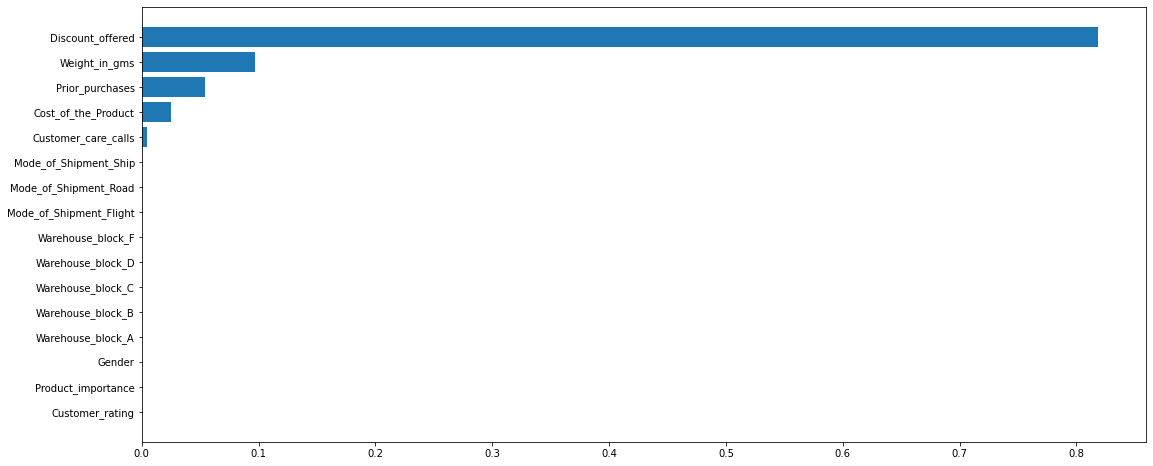

In [17]:
## YOUR CODE HERE

importance = modelr[new[1][0]].feature_importances_
feature = np.argsort(importance)
plt.figure(figsize=(18,8))
plt.barh(range(len(feature)), importance[feature])
plt.yticks(range(len(feature)),np.array(list(X_dev_2.columns))[feature])

# top 3 most important features: discount_offered, weight_in_gms, prior_purchases
# It makes sense these three features are the most important. Discount will directly affect the price, weight directly
# relates to the shipment difficulty, and prior purchases indicates the quality of the service.

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Use accuracy and F1 score to evaluate. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?**

In [18]:
## YOUR CODE HERE

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_dev_2, y_dev)

y_pred_rf = rf.predict(X_test_2)
accuracy_rf = rf.score(X_test_2, y_test)

tn_rf, fp_rf, fn_rf, tp_rf=confusion_matrix(y_pred_rf,np.array(y_test)).ravel()
precision_rf = tp_rf/(tp_rf+fp_rf)
recall_rf = tp_rf/(tp_rf+fn_rf)
F1_rf = 2*precision_rf*recall_rf/(precision_rf+recall_rf)

print('Accuracy on Test Set : ', accuracy_rf)
print('F-1 score on Test Set: ', F1_rf)

# Random forest is doing better than Decision Tree because it has higher acuracy

Accuracy on Test Set :  0.6731818181818182
F-1 score on Test Set:  0.6946921443736731


**2.2: Do all trees in the trained random forest model have pure leaves? How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method**

In [19]:
## YOUR CODE HERE

trees= rf.estimators_

def test(tree):
    impurity = tree.tree_.impurity
    left = tree.tree_.children_left 
    right = tree.tree_.children_right
    
    im_leaf = list()
    
    i = [0]
    while len(i) != 0:
        id_ = i.pop(0)
        
        if left[id_] == right[id_]: 
            im_leaf.append(impurity[id_])
        else:
            i.append(left[id_])
            i.append(right[id_])
    return im_leaf

for tree in trees:
    node_impurity = test(tree)
    assert all(node_impurity) == 0 

# verify pure leaves: the tree is 100% correct on the training set. Here, the impurity is 0, so all trees have pure leaves.

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [20]:
## YOUR SOLUTION HERE

# number of trees involved in the random forest
# number of features to include

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [21]:
## YOUR SOLUTION HERE

# choose randomely in the larger space

**2.5: Perform model selection using the chosen values for the hyperparameters. Use out-of-bag (OOB) error for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [22]:
## YOUR CODE HERE

from sklearn.model_selection import GridSearchCV

parameters = {
     'n_estimators':(25, 50, 75, 100), 
     'max_features':(3, 6, 9, 12),
}

rf_hyp_tune = GridSearchCV(RandomForestClassifier(), parameters, cv = 3)
rf_hyp_tune.fit(X_dev_2, np.ravel(y_dev))
rf_hyp_tune.best_score_, rf_hyp_tune.best_params_

(0.6659847709967042, {'max_features': 9, 'n_estimators': 100})

In [23]:
rf_ms = RandomForestClassifier(max_features=6,n_estimators=50)
rf_ms.fit(X_dev_2,np.ravel(y_dev))

y_pred_ms = rf_ms.predict(X_test_2)
accuracy_ms = rf_ms.score(X_test_2,y_test)

tn_ms, fp_ms, fn_ms, tp_ms = confusion_matrix(y_pred_ms,np.array(y_test)).ravel()
precision_ms = tp_ms/(tp_ms + fp_ms)
recall_ms = tp_ms/(tp_ms + tn_ms)
F1_ms = 2*precision_ms*recall_ms/(precision_ms + recall_ms)

print('Accuracy on Test Set : ', accuracy_ms)
print('F-1 score on Test Set: ', F1_ms)

# This is not doing better than the plain-vanilla random forest model

Accuracy on Test Set :  0.6659090909090909
F-1 score on Test Set:  0.5867530597552196


 **2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?**

([<matplotlib.axis.YTick at 0x7ffa93ad51f0>,
 [Text(0, 0, 'Mode_of_Shipment_Road'),
  Text(0, 1, 'Mode_of_Shipment_Flight'),
  Text(0, 2, 'Warehouse_block_A'),
  Text(0, 3, 'Warehouse_block_D'),
  Text(0, 4, 'Warehouse_block_B'),
  Text(0, 5, 'Warehouse_block_C'),
  Text(0, 6, 'Mode_of_Shipment_Ship'),
  Text(0, 7, 'Warehouse_block_F'),
  Text(0, 8, 'Gender'),
  Text(0, 9, 'Product_importance'),
  Text(0, 10, 'Customer_care_calls'),
  Text(0, 11, 'Customer_rating'),
  Text(0, 12, 'Prior_purchases'),
  Text(0, 13, 'Cost_of_the_Product'),
  Text(0, 14, 'Discount_offered'),
  Text(0, 15, 'Weight_in_gms')])

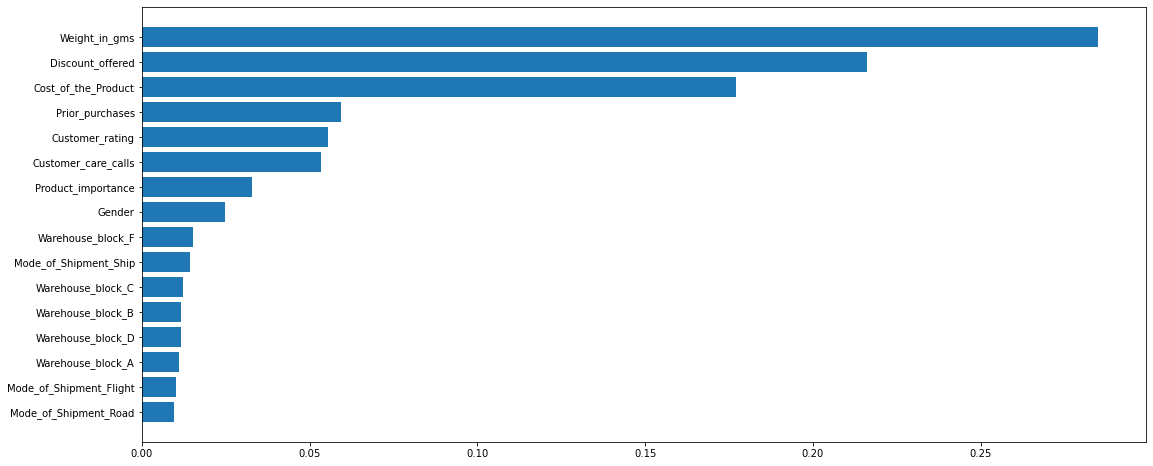

In [24]:
## YOUR CODE HERE

importance_ms = rf_ms.feature_importances_
feature_ms = np.argsort(importance_ms)
plt.figure(figsize=(18,8))
plt.barh(range(len(feature_ms)), importance_ms[feature_ms])
plt.yticks(range(len(feature_ms)),np.array(list(X_dev_2.columns))[feature_ms])

# Top 3 most important features: weight_in_gms, discount_offered, cost_of_the_product
# The features are different
# The model trained in Q2.5 makes more sense because intuitively, if the product is more expensive, the shipment
# service would pay more attention to the product

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [25]:
## YOUR CODE HERE
from sklearn.ensemble import HistGradientBoostingClassifier

start_time = time.time()

params = {'learning_rate': [0.1,0.5,0.9],
          'max_depth': [3,6,9],
          'l2_regularization': [10,15,20]}

m = GridSearchCV(HistGradientBoostingClassifier(),params,verbose=5,cv=5)
m.fit(X_dev_2, y_dev)

end_time = time.time()
m.best_score_, m.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END l2_regularization=10, learning_rate=0.1, max_depth=3;, score=0.690 total time=   0.3s
[CV 2/5] END l2_regularization=10, learning_rate=0.1, max_depth=3;, score=0.684 total time=   0.1s
[CV 3/5] END l2_regularization=10, learning_rate=0.1, max_depth=3;, score=0.684 total time=   0.1s
[CV 4/5] END l2_regularization=10, learning_rate=0.1, max_depth=3;, score=0.662 total time=   0.1s
[CV 5/5] END l2_regularization=10, learning_rate=0.1, max_depth=3;, score=0.675 total time=   0.1s
[CV 1/5] END l2_regularization=10, learning_rate=0.1, max_depth=6;, score=0.684 total time=   0.3s
[CV 2/5] END l2_regularization=10, learning_rate=0.1, max_depth=6;, score=0.671 total time=   0.4s
[CV 3/5] END l2_regularization=10, learning_rate=0.1, max_depth=6;, score=0.669 total time=   0.3s
[CV 4/5] END l2_regularization=10, learning_rate=0.1, max_depth=6;, score=0.653 total time=   0.2s
[CV 5/5] END l2_regularization=10, learning_rat

(0.6803043438937413,
 {'l2_regularization': 15, 'learning_rate': 0.1, 'max_depth': 3})

In [26]:
print('Time: ', end_time - start_time)
print('Best parameter:, ', m.best_params_)

Time:  35.74137592315674
Best parameter:,  {'l2_regularization': 15, 'learning_rate': 0.1, 'max_depth': 3}


In [27]:
gb = HistGradientBoostingClassifier(l2_regularization = 15,max_depth = 3,learning_rate = 0.1)
gb.fit(X_dev_2,np.ravel(y_dev))

y_pred_gb = gb.predict(X_test_2)
accuracy_gb = gb.score(X_test_2,y_test)

tn_gb, fp_gb, fn_gb, tp_gb = confusion_matrix(y_pred_gb,np.array(y_test)).ravel()
precision_gb = tp_gb/(tp_gb + fp_gb)
recall_gb = tp_gb/(tp_gb + fn_gb)
F1_gb = 2*precision_gb*recall_gb/(precision_gb + recall_gb)

print('Accuracy on Test Set : ', accuracy_gb)
print('F-1 score on Test Set: ', F1_gb)

Accuracy on Test Set :  0.69
F-1 score on Test Set:  0.6663405088062622


**3.2: Repeat 3.1 for XGBoost.**

**Note**: For XGBoost, you **DO NOT NEED** to choose the same hyperparameters as HistGradientBoostingClassifier.

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
## YOUR CODE HERE

from xgboost import XGBClassifier

start_time_rp = time.time()
parameters_rp = {'eta': [0.2,0.5,1.0],
               'max_depth': [4,7,10],
               'n_estimators': [30,60,90]}

xgb = GridSearchCV(XGBClassifier(),parameters_rp,verbose=5,cv=5)
xgb.fit(X_dev_2, y_dev)
end_time_rp = time.time()
xgb.best_score_, xgb.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END eta=0.2, max_depth=4, n_estimators=30;, score=0.686 total time=   0.1s
[CV 2/5] END eta=0.2, max_depth=4, n_estimators=30;, score=0.685 total time=   0.1s
[CV 3/5] END eta=0.2, max_depth=4, n_estimators=30;, score=0.680 total time=   0.1s
[CV 4/5] END eta=0.2, max_depth=4, n_estimators=30;, score=0.668 total time=   0.1s
[CV 5/5] END eta=0.2, max_depth=4, n_estimators=30;, score=0.680 total time=   0.1s
[CV 1/5] END eta=0.2, max_depth=4, n_estimators=60;, score=0.685 total time=   0.1s
[CV 2/5] END eta=0.2, max_depth=4, n_estimators=60;, score=0.671 total time=   0.1s
[CV 3/5] END eta=0.2, max_depth=4, n_estimators=60;, score=0.676 total time=   0.2s
[CV 4/5] END eta=0.2, max_depth=4, n_estimators=60;, score=0.664 total time=   0.1s
[CV 5/5] END eta=0.2, max_depth=4, n_estimators=60;, score=0.672 total time=   0.2s
[CV 1/5] END eta=0.2, max_depth=4, n_estimators=90;, score=0.677 total time=   0.2s
[CV 2/5] END e

(0.6798499922476615, {'eta': 0.2, 'max_depth': 4, 'n_estimators': 30})

In [30]:
print('Time: ', end_time_rp - start_time_rp)
print('Best parameter:, ', xgb.best_params_)

Time:  32.31956195831299
Best parameter:,  {'eta': 0.2, 'max_depth': 4, 'n_estimators': 30}


In [31]:
xgb_rp = XGBClassifier(n_estimators = 30, max_depth = 4, eta = 0.2)
xgb_rp.fit(X_dev_2,np.ravel(y_dev))

y_pred_xgb = xgb_rp.predict(X_test_2)
accuracy_xgb = xgb_rp.score(X_test_2,y_test)

tn_xgb, fp_xgb, fn_xgb, tp_xgb = confusion_matrix(y_pred_xgb,np.array(y_test)).ravel()
precision_xgb = tp_xgb/(tp_xgb + fp_xgb)
recall_xgb = tp_xgb/(tp_xgb + fn_xgb)
F1_xgb = 2*precision_xgb*recall_xgb/(precision_xgb + recall_xgb)

print('Accuracy on Test Set : ', accuracy_xgb)
print('F-1 score on Test Set: ', F1_xgb)

Accuracy on Test Set :  0.6931818181818182
F-1 score on Test Set:  0.6731234866828087


**3.3: Compare the results on the test dataset of XGBoost and HistGradientBoostingClassifier. Which model do you prefer and why?**

In [ ]:
## YOUR CODE HERE
# XGBoost does better than HistGradientBoostingClassifier. XGBoost should be preferred because it takes 
# less time to do model selection and is with better accuracy and F-1 score.

**3.4: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?**

([<matplotlib.axis.YTick at 0x7ffa82d069a0>,
 [Text(0, 0, 'Mode_of_Shipment_Road'),
  Text(0, 1, 'Gender'),
  Text(0, 2, 'Warehouse_block_A'),
  Text(0, 3, 'Customer_rating'),
  Text(0, 4, 'Warehouse_block_C'),
  Text(0, 5, 'Product_importance'),
  Text(0, 6, 'Warehouse_block_F'),
  Text(0, 7, 'Warehouse_block_B'),
  Text(0, 8, 'Warehouse_block_D'),
  Text(0, 9, 'Mode_of_Shipment_Ship'),
  Text(0, 10, 'Mode_of_Shipment_Flight'),
  Text(0, 11, 'Customer_care_calls'),
  Text(0, 12, 'Cost_of_the_Product'),
  Text(0, 13, 'Weight_in_gms'),
  Text(0, 14, 'Prior_purchases'),
  Text(0, 15, 'Discount_offered')])

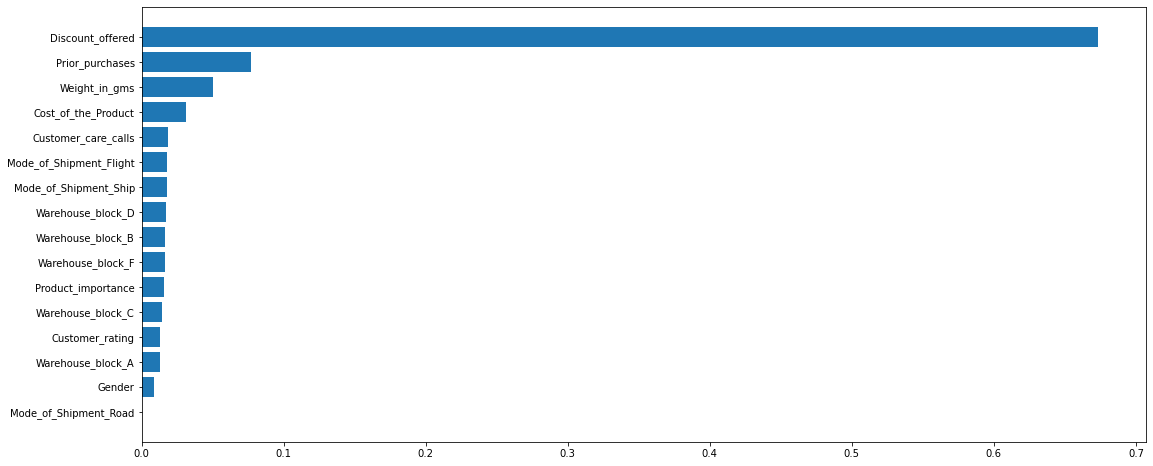

In [32]:
## YOUR CODE HERE

importance_xgb = xgb_rp.feature_importances_
feature_xgb = np.argsort(importance_xgb)
plt.figure(figsize=(18,8))
plt.barh(range(len(feature_xgb)), importance_xgb[feature_xgb])
plt.yticks(range(len(feature_xgb)),np.array(list(X_dev_2.columns))[feature_xgb])

# top 3 most important features: discount_offered, prior_purchases, weight_in_gms.
# The features are the same with the ones in decision tree but different from the ones in random forest. 

**3.5: Can you choose the top 5 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [33]:
## YOUR CODE HERE

start_time_xgb = time.time()
parameters_xgb = {'eta': [0.2,0.5,1.0],
               'max_depth': [4,7,10],
               'n_estimators': [30,60,90]}

dev_5 = ['Discount_offered', 'Prior_purchases', 'Weight_in_gms', 'Cost_of_the_Product', 'Customer_care_calls']

xgb_rp = GridSearchCV(XGBClassifier(),parameters_xgb,verbose=5,cv=5)
xgb_rp.fit(X_dev_2[dev_5], y_dev)
end_time_xgb = time.time()
xgb_rp.best_score_, xgb_rp.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END eta=0.2, max_depth=4, n_estimators=30;, score=0.689 total time=   0.1s
[CV 2/5] END eta=0.2, max_depth=4, n_estimators=30;, score=0.684 total time=   0.0s
[CV 3/5] END eta=0.2, max_depth=4, n_estimators=30;, score=0.679 total time=   0.0s
[CV 4/5] END eta=0.2, max_depth=4, n_estimators=30;, score=0.668 total time=   0.0s
[CV 5/5] END eta=0.2, max_depth=4, n_estimators=30;, score=0.674 total time=   0.0s
[CV 1/5] END eta=0.2, max_depth=4, n_estimators=60;, score=0.681 total time=   0.1s
[CV 2/5] END eta=0.2, max_depth=4, n_estimators=60;, score=0.681 total time=   0.1s
[CV 3/5] END eta=0.2, max_depth=4, n_estimators=60;, score=0.674 total time=   0.1s
[CV 4/5] END eta=0.2, max_depth=4, n_estimators=60;, score=0.668 total time=   0.1s
[CV 5/5] END eta=0.2, max_depth=4, n_estimators=60;, score=0.670 total time=   0.1s
[CV 1/5] END eta=0.2, max_depth=4, n_estimators=90;, score=0.677 total time=   0.1s
[CV 2/5] END e

(0.6787129825830791, {'eta': 0.2, 'max_depth': 4, 'n_estimators': 30})

In [34]:
print('Time: ', end_time_xgb - start_time_xgb)
print('Best parameter:, ', xgb_rp.best_params_)

Time:  20.062683820724487
Best parameter:,  {'eta': 0.2, 'max_depth': 4, 'n_estimators': 30}


In [35]:
xgb_new = XGBClassifier(n_estimators = 30, max_depth = 4, eta = 0.2)
xgb_new.fit(X_dev_2,np.ravel(y_dev))

y_pred_xgb_new = xgb_new.predict(X_test_2)
accuracy_xgb_new = xgb_new.score(X_test_2,y_test)

tn_xgb_new, fp_xgb_new, fn_xgb_new, tp_xgb_new = confusion_matrix(y_pred_xgb_new,np.array(y_test)).ravel()
precision_xgb_new = tp_xgb_new/(tp_xgb_new + fp_xgb_new)
recall_xgb_new = tp_xgb_new/(tp_xgb_new + fn_xgb_new)
F1_xgb_new = 2*precision_xgb_new*recall_xgb_new/(precision_xgb_new + recall_xgb_new)

print('Accuracy on Test Set : ', accuracy_xgb_new)
print('F-1 score on Test Set: ', F1_xgb_new)

Accuracy on Test Set :  0.6931818181818182
F-1 score on Test Set:  0.6731234866828087


In [ ]:
# The accuracy and F-1 score have no significant change, but the time is less shorter than the previous one

## Question 4: Calibration

**4.1: Estimate the brier score for the HistGradientBoosting model (trained with optimal hyperparameters from Q3.1) scored on the test dataset.**

In [36]:
## YOUR CODE HERE

from sklearn.metrics import brier_score_loss

print(gb.predict(X_test_2))
print(gb.predict_proba(X_test_2)) 

prob = gb.predict_proba(X_test_2)[:,1]
score = brier_score_loss(y_test,prob)

print('Brier score: ', score)

[1 0 1 ... 1 0 1]
[[0.00164382 0.99835618]
 [0.62982561 0.37017439]
 [0.21856339 0.78143661]
 ...
 [0.4996842  0.5003158 ]
 [0.63457551 0.36542449]
 [0.24413301 0.75586699]]
Brier score:  0.1763849388813781


**4.2: Calibrate the trained HistGradientBoosting model using Platt Scaling. Print the brier score after calibration and plot predicted v.s. actual on test datasets from the calibration method.**

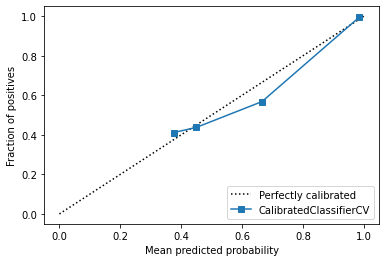

In [37]:
## YOUR CODE HERE

from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV

X_train, X_cal, y_train, y_cal = train_test_split(X_dev_2, y_dev, test_size = 0.2, random_state = 0)
calibration = CalibratedClassifierCV(gb, cv = "prefit", method = "sigmoid")
calibration.fit(X_cal, y_cal)
display = CalibrationDisplay.from_estimator(calibration, X_test_2, y_test)

In [38]:
prob_cal = calibration.predict_proba(X_test_2)[:, 1]
score_cal = brier_score_loss(y_test,prob_cal)
score_cal

0.17659421441782486

**4.3: Compare the brier scores from 4.1 and 4.2. Do the calibration methods help in having better predicted probabilities?**

In [39]:
## YOUR CODE HERE

# The score has increased a little bit. The calibration helps.